In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines


In [2]:
spark = SparkSession.builder.master('local').config('spark.driver.memory', '32g').appName(
    'Read_file').getOrCreate()


In [3]:
pe_result = spark.read.parquet(
    '/Users/gabriele.sabato/Downloads/part-00000-fe80a58a-b6f6-4a32-b099-43e41c984e04-c000.snappy.parquet')

In [24]:
pe_result.show()

+--------+------------+--------+------------+---------+-------------+------------+---------------+
|Sales_PE|Sales_PE_err|del_week|del_week_err|intercept|intercept_err|Cluster_size|has_enough_stat|
+--------+------------+--------+------------+---------+-------------+------------+---------------+
| -1.1882|      0.4801|  -0.326|      0.1303|   4.8507|       1.8369|           2|          false|
| -0.3762|      0.3814| -0.1054|      0.0858|   1.9975|       1.7758|           2|          false|
| -0.3113|      0.1758| -0.0549|      0.0345|   1.7154|       0.8812|          10|          false|
| -0.0518|      0.0849|   -0.01|      0.0264|    0.306|       0.2798|          13|          false|
| -0.1576|      0.0856|  0.0063|      0.0074|   1.9749|       0.3956|          14|          false|
| -0.1599|      0.1173|  0.0026|      0.0102|   0.9097|       0.6155|          15|          false|
|  -0.277|      0.1093| -0.0048|       0.007|   1.5751|       0.5653|          15|          false|
|  0.1581|

In [5]:
def create_legend(flag={'blue': 'Items with sign stat', 'red': 'Items with not sign stat'}):
    good_stat_leg = []
    for key in flag.keys():
        good_stat_leg.append(mlines.Line2D([], [], color=key, marker='o',
                                           markersize=6, label=flag[key]))

    plt.legend(handles=good_stat_leg)


In [27]:
pe_result.dtypes

[('Sales_PE', 'double'),
 ('Sales_PE_err', 'double'),
 ('del_week', 'double'),
 ('del_week_err', 'double'),
 ('intercept', 'double'),
 ('intercept_err', 'double'),
 ('Cluster_size', 'bigint'),
 ('has_enough_stat', 'boolean')]

In [6]:
a_df = pe_result.toPandas()

In [30]:
a_df.dtypes

Sales_PE           float64
Sales_PE_err       float64
del_week           float64
del_week_err       float64
intercept          float64
intercept_err      float64
Cluster_size         int64
has_enough_stat       bool
dtype: object

In [34]:
a_df[a_df['has_enough_stat']==False]

,Sales_PE,Sales_PE_err,del_week,del_week_err,intercept,intercept_err,Cluster_size,has_enough_stat


In [19]:
def create_N_items_cluster_plot(a_df, color: str, has_enough_stat=True):
    pe_pd = a_df[a_df['has_enough_stat']==has_enough_stat]
    plt.hist(pe_pd['Cluster_size'], color= color)
    plt.xlabel('items per cluster')
    create_legend({color: 'Items with enough stat'})

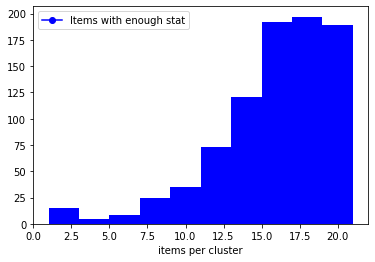

In [20]:
create_N_items_cluster_plot(a_df, 'blue', True)


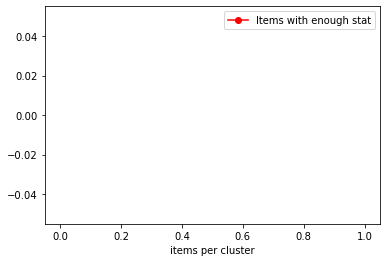

In [21]:
create_N_items_cluster_plot(a_df, 'red', False)

In [5]:
pe_result_true = (pe_result.
                  where(F.col('has_enough_stat') == True)
                  .selectExpr('*')
                  )

In [6]:
pe_result_true.show()

+--------+------------+--------+------------+---------+-------------+------------+---------------+
|Sales_PE|Sales_PE_err|del_week|del_week_err|intercept|intercept_err|Cluster_size|has_enough_stat|
+--------+------------+--------+------------+---------+-------------+------------+---------------+
|   0.426|      0.1019|  0.0548|      0.0319|  -1.2731|        0.328|          16|           true|
|  0.4172|       0.115|  0.0374|       0.036|  -1.0313|       0.3519|          16|           true|
| -0.1345|      0.0432|  0.0083|      0.0149|   0.5032|       0.1672|          18|           true|
|  0.4992|      0.1405|  0.0349|       0.032|  -1.2706|       0.4276|          20|           true|
|  0.7884|      0.1889| -0.0327|      0.0353|  -2.6997|       0.6968|          12|           true|
|  0.5312|       0.157| -0.0441|       0.032|  -1.4784|       0.5326|          14|           true|
|  0.4801|      0.1276|  0.0191|      0.0258|  -1.5655|       0.4694|          20|           true|
| -0.2298|

In [9]:
pe_result_true.selectExpr('COUNT(*)').show()

+--------+
|count(1)|
+--------+
|     860|
+--------+

